<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r5_i1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-15-m-1-r5.csv?token=AKVFSOBWKYXIRA76WSCXAKC63IPFO')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-normal-n-0-15-r5.csv?token=AKVFSOCGSVWLPJVTTUYPXVK63IPGU')


In [0]:
df = df1.append(df9, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [21]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,84,3,2,4,1,1,5,17,23,7,1,1,2,3,2,0.666667,12,97,1,97,97,6,8,20,340,0
1,84,4,2,4,1,1,5,17,23,7,0,0,1,4,2,0.500000,12,47,1,47,47,8,4,20,340,1
2,85,3,2,4,2,2,5,17,23,7,1,1,2,3,2,0.666667,13,96,2,97,192,6,32,20,340,0
3,85,4,2,4,2,2,5,17,23,7,0,0,1,4,2,0.500000,13,46,2,47,92,8,16,20,340,1
4,86,4,2,4,3,2,5,17,23,7,0,0,1,4,2,0.500000,14,45,3,47,135,8,24,20,340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108158,3276597,2,4,4,2,2,5,17,20,4,15,15,30092,5,1,0.200000,9,5,14,18,70,8,481472,20,340,0
108159,3276598,2,4,4,3,2,5,17,20,4,15,15,30092,5,1,0.200000,10,4,15,18,60,8,722208,20,340,0
108160,3276599,2,4,4,4,2,5,17,20,4,15,15,30092,5,1,0.200000,11,3,16,18,48,8,962944,20,340,0
108161,3276600,2,4,3,1,4,3,9,20,4,18,2,30092,3,1,0.333333,12,2,17,18,34,8,361104,9,81,0


In [22]:
df.shape

(108163, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-15-m-11-r5.csv?token=AKVFSOG4BTBXRS6QBNRTBWS63IPFS')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-15-m-12-r5.csv?token=AKVFSOFGZZNKP3BWO7VOX4263IPSK')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-15-m-7-r5.csv?token=AKVFSOF5WUCWSF74MB4QTN263IPSO')


In [24]:
print(df13.shape)
print(df14.shape)
print(df15.shape)

(52701, 26)
(50255, 26)
(62551, 26)


Processing

In [25]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [27]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.212827,-0.012116,0.024065,-0.036564,0.493510,0.493925,-0.002562,0.151468,0.115534,-0.088058,-0.315577,-0.022938,0.023866,0.000692,-0.015512,0.465940,-0.025270,0.411520,0.509612,-0.088040
inport,-0.212827,1.000000,-0.197052,-0.003882,0.005898,0.129215,0.086236,-0.077258,0.101405,-0.388903,-0.245392,-0.258331,-0.055292,-0.106624,-0.120818,-0.094932,0.729911,-0.082412,-0.046704,0.048210,0.076040
cache_coherence_type,-0.012116,-0.197052,1.000000,0.156568,-0.237886,-0.266933,-0.267949,0.055128,-0.089294,-0.103473,-0.149325,-0.099728,0.059707,0.004827,0.048154,0.038192,-0.194607,0.269919,0.568829,0.049915,-0.006457
flit_id,0.024065,-0.003882,0.156568,1.000000,-0.012250,0.278923,0.268995,0.009167,0.090406,0.041644,0.002239,0.349306,-0.034649,0.049049,0.010745,0.006204,0.010113,0.624251,0.362766,0.335098,-0.019101
flit_type,-0.036564,0.005898,-0.237886,-0.012250,1.000000,-0.423789,-0.408706,-0.013928,-0.137361,-0.063274,-0.003401,0.263247,-0.047320,0.026479,-0.015551,-0.009163,-0.015365,0.162530,-0.551180,-0.509141,0.029021
vnet,0.493510,0.129215,-0.266933,0.278923,-0.423789,1.000000,0.990132,-0.001828,0.319042,0.009651,-0.057974,-0.422952,-0.031949,0.026564,-0.004019,-0.017919,0.441663,-0.013795,0.640774,0.946031,-0.128638
vc,0.493925,0.086236,-0.267949,0.268995,-0.408706,0.990132,1.000000,-0.000005,0.294722,-0.035965,-0.110834,-0.414397,-0.030888,0.037515,0.004945,-0.008964,0.409286,-0.015255,0.631543,0.946313,-0.126955
traversal_id,-0.002562,-0.077258,0.055128,0.009167,-0.013928,-0.001828,-0.000005,1.000000,-0.090887,0.016984,0.061889,0.021592,0.131824,0.132811,0.197465,0.125226,-0.074275,0.572906,0.042357,0.016029,-0.288630
hop_count,0.151468,0.101405,-0.089294,0.090406,-0.137361,0.319042,0.294722,-0.090887,1.000000,0.396979,-0.105593,0.022903,-0.114713,-0.095922,-0.157170,-0.138090,0.125364,-0.062936,0.201142,0.287765,0.222089
current_hop,0.115534,-0.388903,-0.103473,0.041644,-0.063274,0.009651,-0.035965,0.016984,0.396979,1.000000,0.801356,0.439151,0.005956,-0.024514,-0.013848,-0.026752,-0.286724,-0.010304,-0.074194,-0.051422,-0.016876


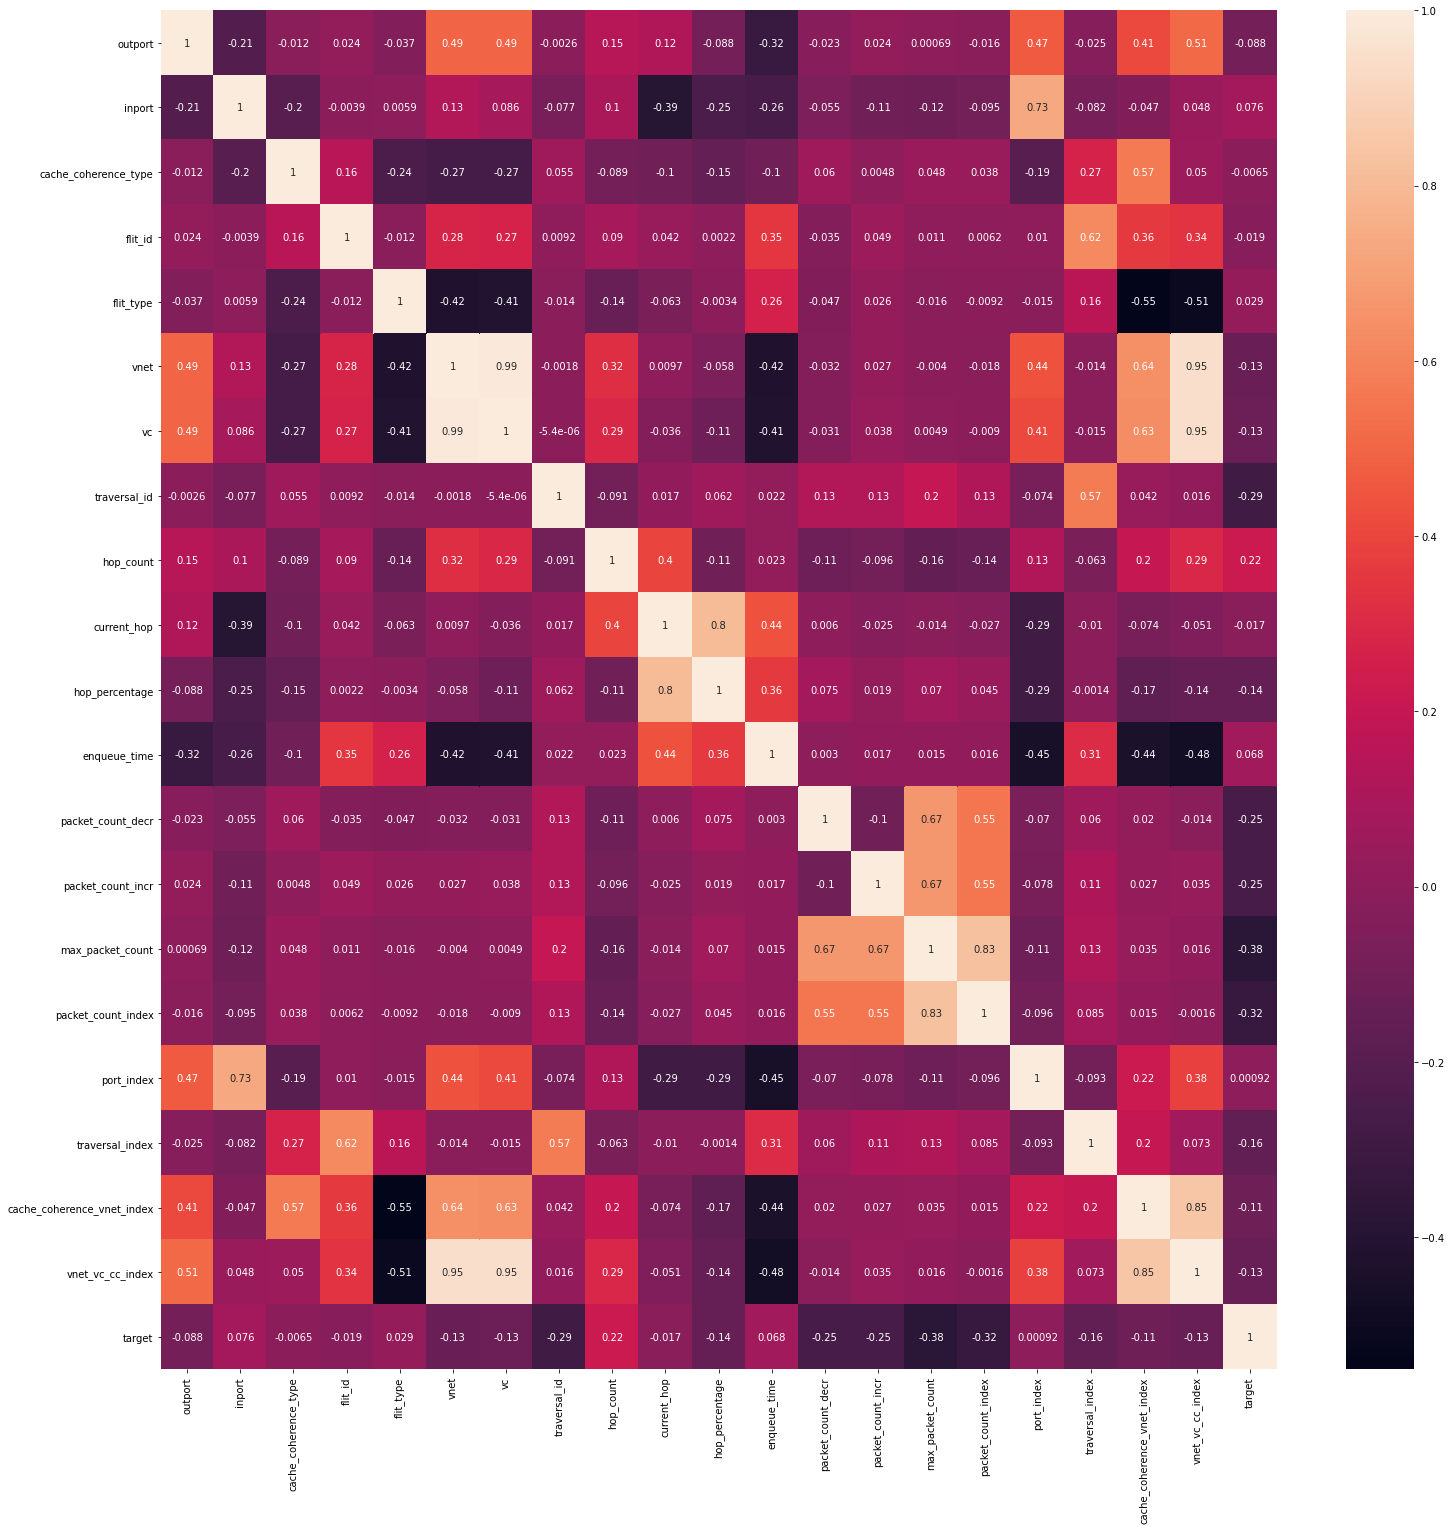

In [28]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [30]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'vnet']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

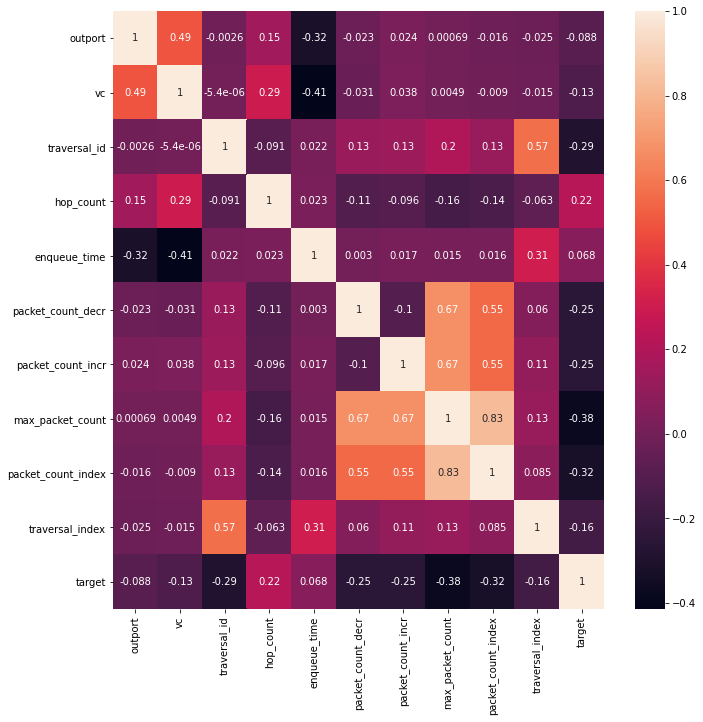

In [32]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

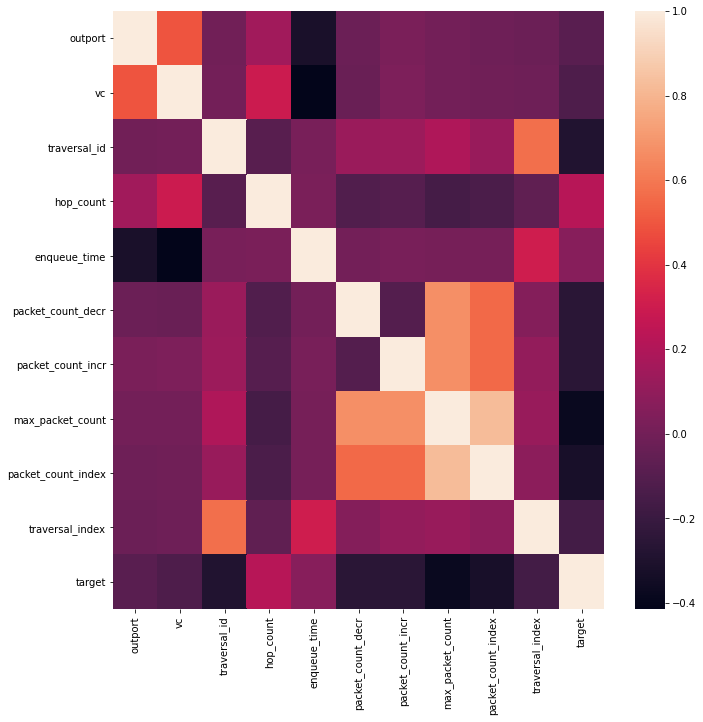

In [33]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [35]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.75,0.888889,0.000033,0.50,0.131148,0.662069,0.000000,0.662069,0.017774,0.000001
1,1.00,0.888889,0.000000,0.75,0.131148,0.317241,0.000000,0.317241,0.008517,0.000000
2,0.75,0.888889,0.000033,0.50,0.147541,0.655172,0.006897,0.662069,0.035364,0.000010
3,1.00,0.888889,0.000000,0.75,0.147541,0.310345,0.006897,0.317241,0.016849,0.000004
4,1.00,0.888889,0.000000,0.75,0.163934,0.303448,0.013793,0.317241,0.024810,0.000007
...,...,...,...,...,...,...,...,...,...,...
108158,0.50,0.888889,1.000000,1.00,0.081967,0.027586,0.089655,0.117241,0.012775,0.178007
108159,0.50,0.888889,1.000000,1.00,0.098361,0.020690,0.096552,0.117241,0.010924,0.267012
108160,0.50,0.888889,1.000000,1.00,0.114754,0.013793,0.103448,0.117241,0.008702,0.356016
108161,0.50,0.000000,1.000000,0.50,0.131148,0.006897,0.110345,0.117241,0.006110,0.133505


In [36]:
train_X[train_X.duplicated()].shape

(0, 10)

In [37]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,1.0,0.888889,0.0,0.666667,0.133333,0.594340,0.000000,0.59434,0.021612,0.000000
1,1.0,0.888889,0.0,0.666667,0.150000,0.584906,0.009434,0.59434,0.042882,0.000004
2,1.0,0.888889,0.0,0.666667,0.166667,0.575472,0.018868,0.59434,0.063465,0.000007
3,1.0,0.888889,0.0,0.666667,0.183333,0.566038,0.028302,0.59434,0.083362,0.000010
4,1.0,0.888889,0.0,0.666667,0.250000,0.556604,0.037736,0.59434,0.102573,0.000021
...,...,...,...,...,...,...,...,...,...,...
52696,0.5,0.888889,1.0,1.000000,0.083333,0.037736,0.009434,0.04717,0.003087,0.178007
52697,0.5,0.888889,1.0,1.000000,0.100000,0.028302,0.018868,0.04717,0.003774,0.267012
52698,0.5,0.888889,1.0,1.000000,0.116667,0.018868,0.028302,0.04717,0.003774,0.356016
52699,0.5,0.000000,1.0,0.333333,0.133333,0.009434,0.037736,0.04717,0.003087,0.133505


In [38]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [39]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [41]:
train_Y = df['target']
train_Y.value_counts()

0    73806
1    34357
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
7    max_packet_count  1294.884194
8  packet_count_index  1107.779459
2        traversal_id  1018.332477
5   packet_count_decr   648.345585
6   packet_count_incr   646.539467
1                  vc   466.631046
3           hop_count   455.912265
9     traversal_index   310.362168
0             outport    72.048573
4        enqueue_time    45.401282


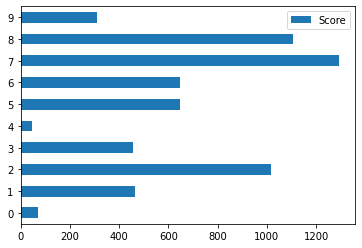

In [44]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [46]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [49]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 96.91178296926962
Test Prediction Score 95.50624754860762


In [50]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 78.5848465873513
Test Prediction Score 76.24117003283256
Test Prediction Score 78.90201595498073


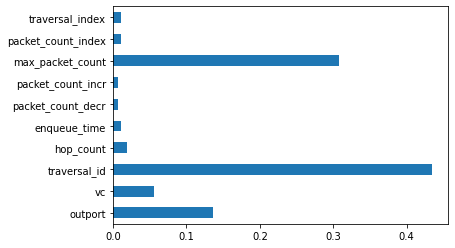

In [51]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

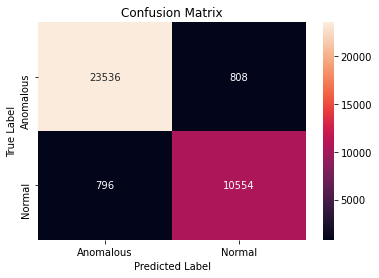

In [52]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [53]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     24344
           1       0.93      0.93      0.93     11350

    accuracy                           0.96     35694
   macro avg       0.95      0.95      0.95     35694
weighted avg       0.96      0.96      0.96     35694



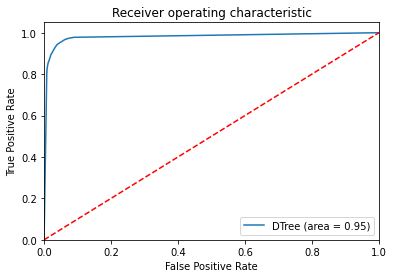

In [54]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [56]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r5l-i1.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [59]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 99.36403877402364


In [60]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 81.64930456727576
Test Prediction Score 77.2838523529997
Test Prediction Score 80.88439833096194


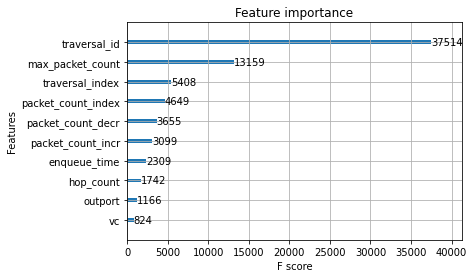

In [61]:
plot_importance(xgbc)
plt.show()

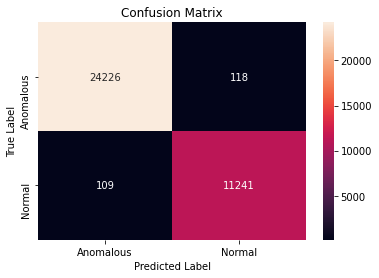

In [62]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [63]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24344
           1       0.99      0.99      0.99     11350

    accuracy                           0.99     35694
   macro avg       0.99      0.99      0.99     35694
weighted avg       0.99      0.99      0.99     35694



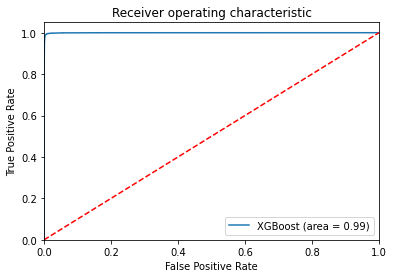

In [64]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()